Задача интересней чем казалась, и, вы были правы, она заняла у меня весьма существенное время. Вообще она похожа на динамику, если бы не возможность "идти назад".

Здесь постараюсь показать ход моих мыслей.

Элементарное решение, которое сходу приходит в голову выглядит так.

In [0]:
def f1(N,i):
    if N==1:
        return 1,i
    if N%2==0:
        return f2(N/2, i+1)
    if N>1:
        return f2(N-1, i+1)
    return f2(N+1, i+1) #*
def F1(n):
    return f2(n,0)[1]

In [73]:
print(F1(32))
print(F1(31))

5
8


Неправильное, поскольку строка * вообще ни разу не вызовется. F2 не использует возможность "идти назад". И если бы не строка * функцию можно было бы переписать в динамику. 

Пояснение:
Для 32 (и вообще всех квадратов двойки) идеальной стратегией будет все время /2. Ответ - 5.
Для 31 сначала +1, затем все время /2. Ответ - 6. Код выдает 8.

Попытка 2: Пойдем от 1 к n при этом будем использовать "ход назад". Вторым приоритетом будет операция умножения на 2, для того чтобы такая возможность вообще появилась.

In [0]:
def F2(N):
    def f2(n, i):
        if n == N:
            return n, i
        if n > N:
            return f2(n - 1, i + 1)
        if n * 2 - N < N - n:
            return f2(n * 2, i + 1)
        return f2(n + 1, i + 1)
    return f2(1, 0)[1]

In [75]:
F2(31)

6

Идеально. ... Думал бы я если бы не построил график (я же все-таки на ML хочу)

In [0]:
import matplotlib.pyplot as plt

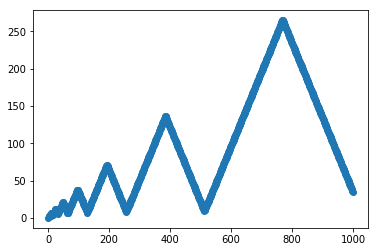

In [77]:
x = range(1,1000)
y = [F2(i) for i in x]
plt.scatter(x,y)

График явно неадекватный, и еще лучше это видно если наложить на него решение F1.

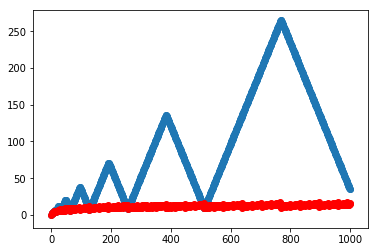

In [78]:
x2 = range(1,1000)
y2 = [F1(i) for i in x2]
plt.scatter(x,y)
plt.scatter(x2,y2, c='r')

Однако, в локальных минимумах, близ квадратов двойки, F2 лидирует.

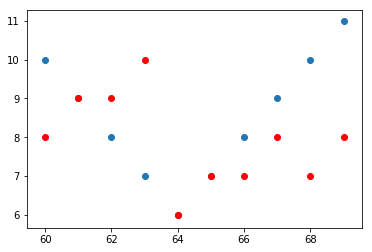

In [79]:
x = range(60,70)
y = [F2(i) for i in x]
x2 = range(60,70)
y2 = [F1(i) for i in x2]
plt.scatter(x,y)
plt.scatter(x2,y2, c='r')

И понятно почему.
Стратегия F1: дели если можешь.
Стратегия F2: воспользуйся шагом назад, т.е. иди к ближайшему квадрату.

Хорошим решением кажется объеденить эти две функции.

In [0]:
def F3(n):
  return min(F1(n), F2(n))

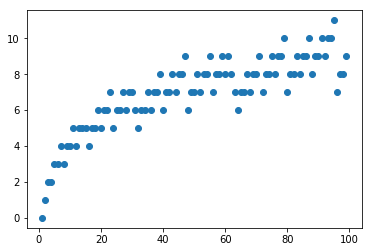

In [81]:
x2 = range(1,100)
y2 = [F3(i) for i in x2]
plt.scatter(x2,y2)

Проверка времени

In [0]:
from time import time

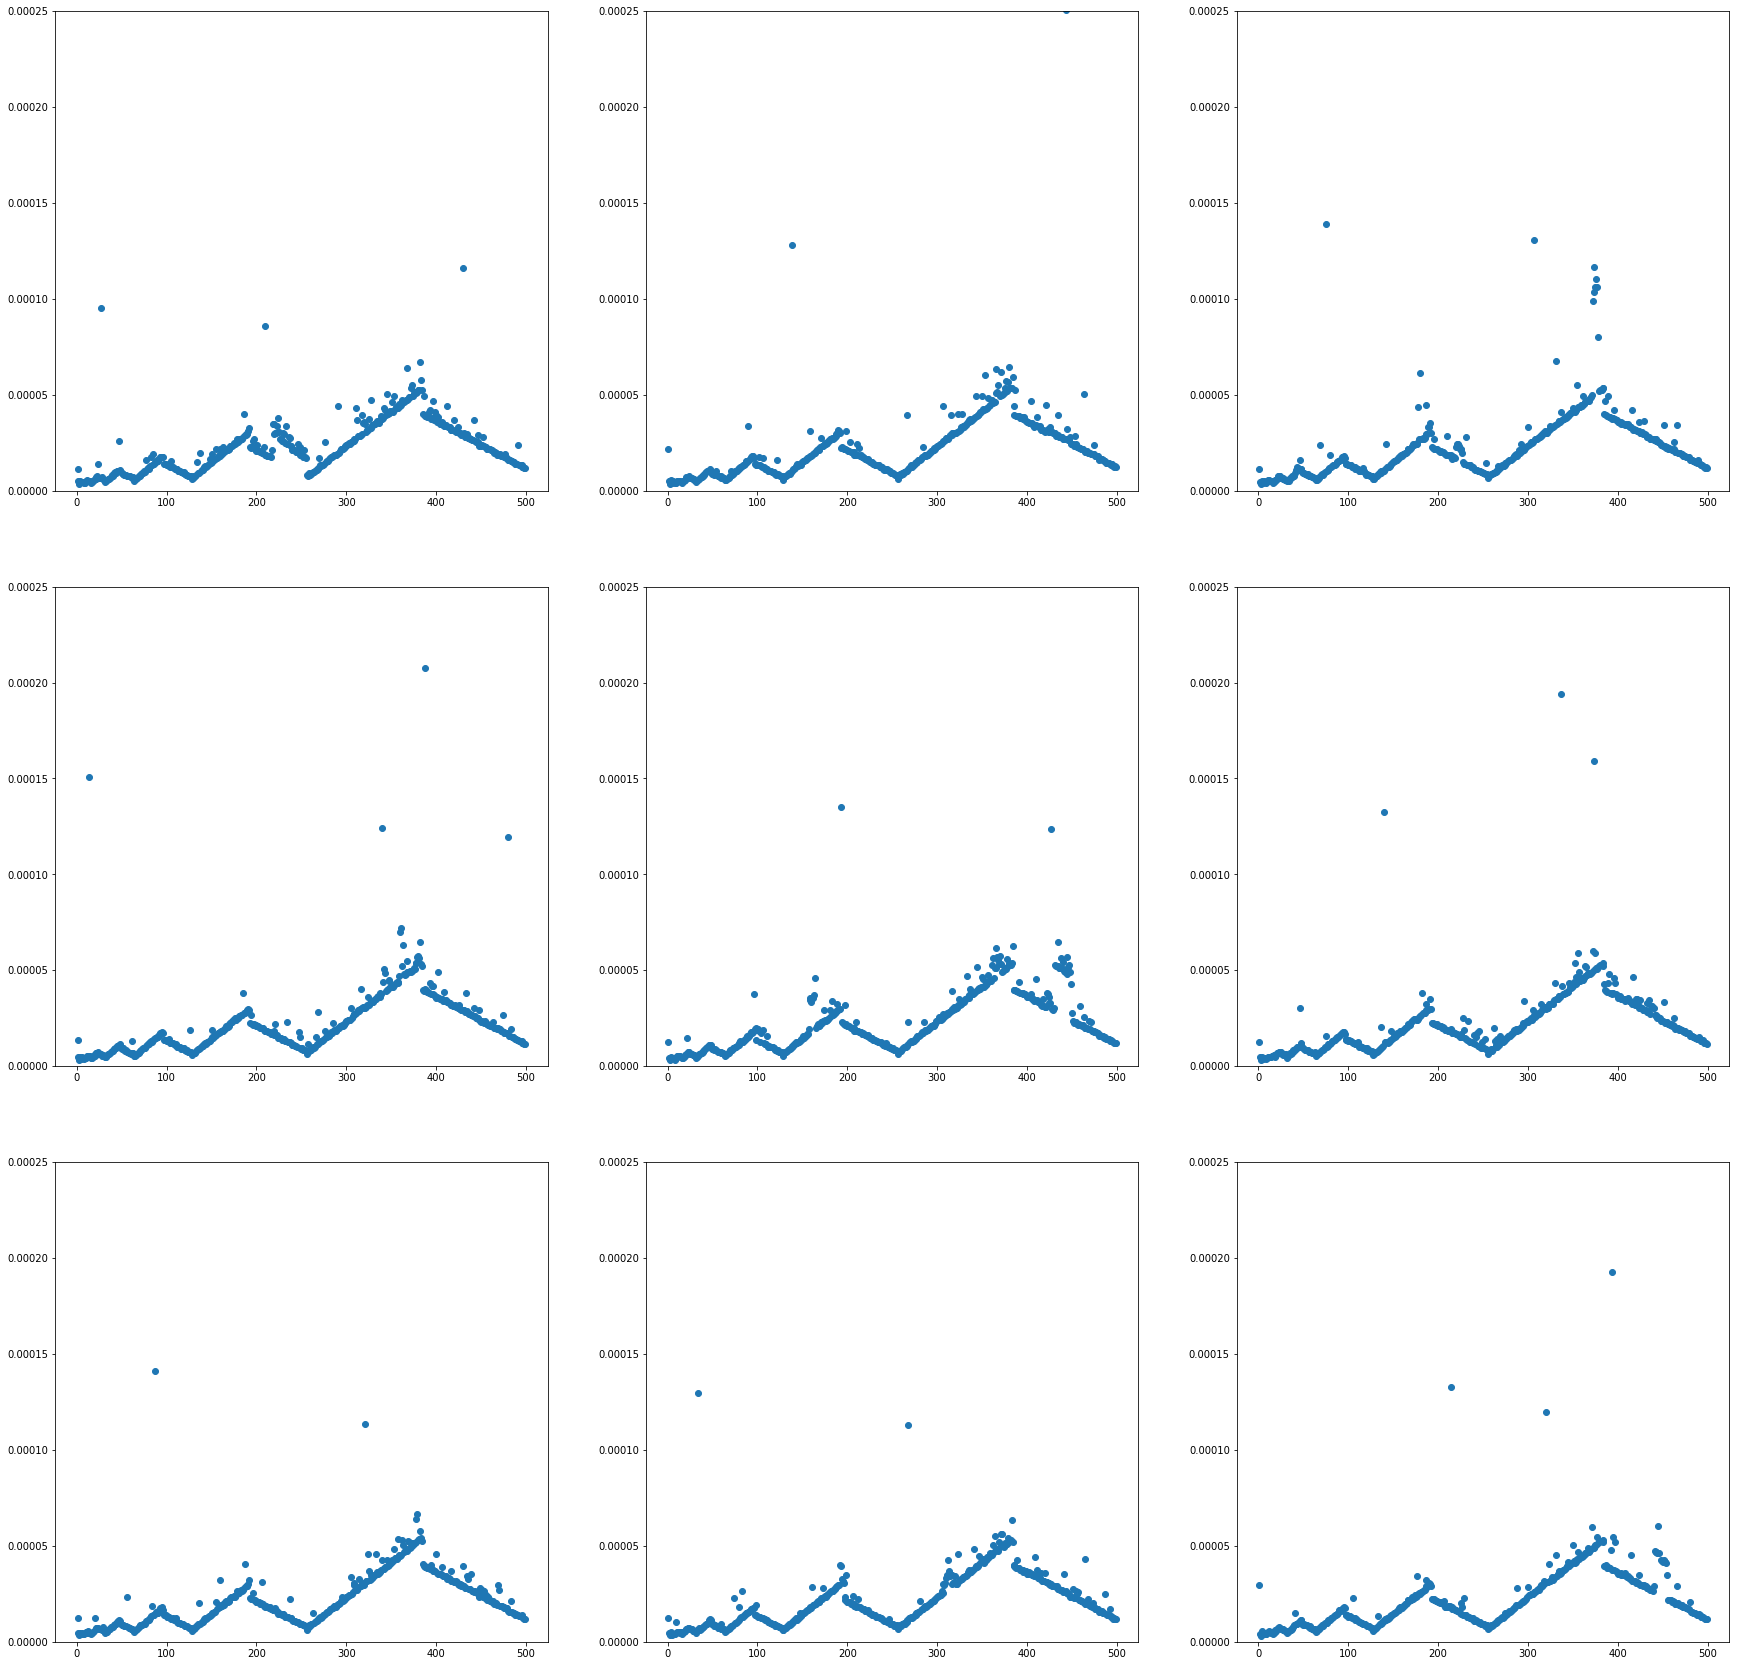

In [83]:
f, axes = plt.subplots(3,3, figsize=(30, 30))

for ax in axes.ravel():
  l = []
  for i in range(1,500):
    t0=time()
    z=F3(i)
    t1=time()
    l.append(t1-t0)  
  ax.set_ylim([0,0.00025])
  ax.scatter(range(1,500), l)

Видно что F2 "утягивает на себя одеяло".

Но

F2 можно вычислить аналитически "посмотри насколько далеко ближайший квадрат"

F1 переписывается в классическую динамику, тк "шаг назад" уже не нужен.

In [0]:
q = [2<<i for i in range(0,20)] #зарание расчитаные квадраты

In [0]:
def analytical(n):
  if n==1: return 0  
  if n==2: return 1

  i=0
  while n>q[i]:
    i=i+1
  if n-q[i-1]<=q[i]-n:
    return i + n-q[i-1]
  else:
    return i+1 + q[i]-n

In [0]:
def dynamics(n):
  t = [0 for i in range(0,max(n+1,8))]
  t[1]=0
  t[2]=1
  t[3]=2
  t[4]=2
  t[5]=3
  t[6]=3
  t[7]=4
  if n>7:
    for i in range(7,n+1):
      if(i%2==0):
        t[i] = min(t[i-1],t[int(i/2)])+1
      else:
        t[i] = t[i-1]+1
  return t[n]  

Собираем химеру:

In [0]:
def F4(n):
  return min(dynamics(n), analytical(n))

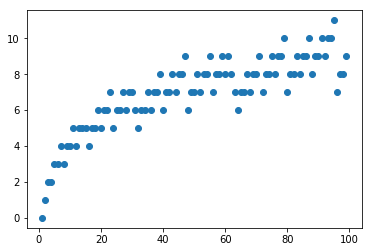

In [88]:
x2 = range(1,100)
y2 = [F4(i) for i in x2]
plt.scatter(x2,y2)

Tecт:

In [0]:
for i in range(1,100):
  if F3(i)!=F4(i):
    print('flag')

Тест на время:

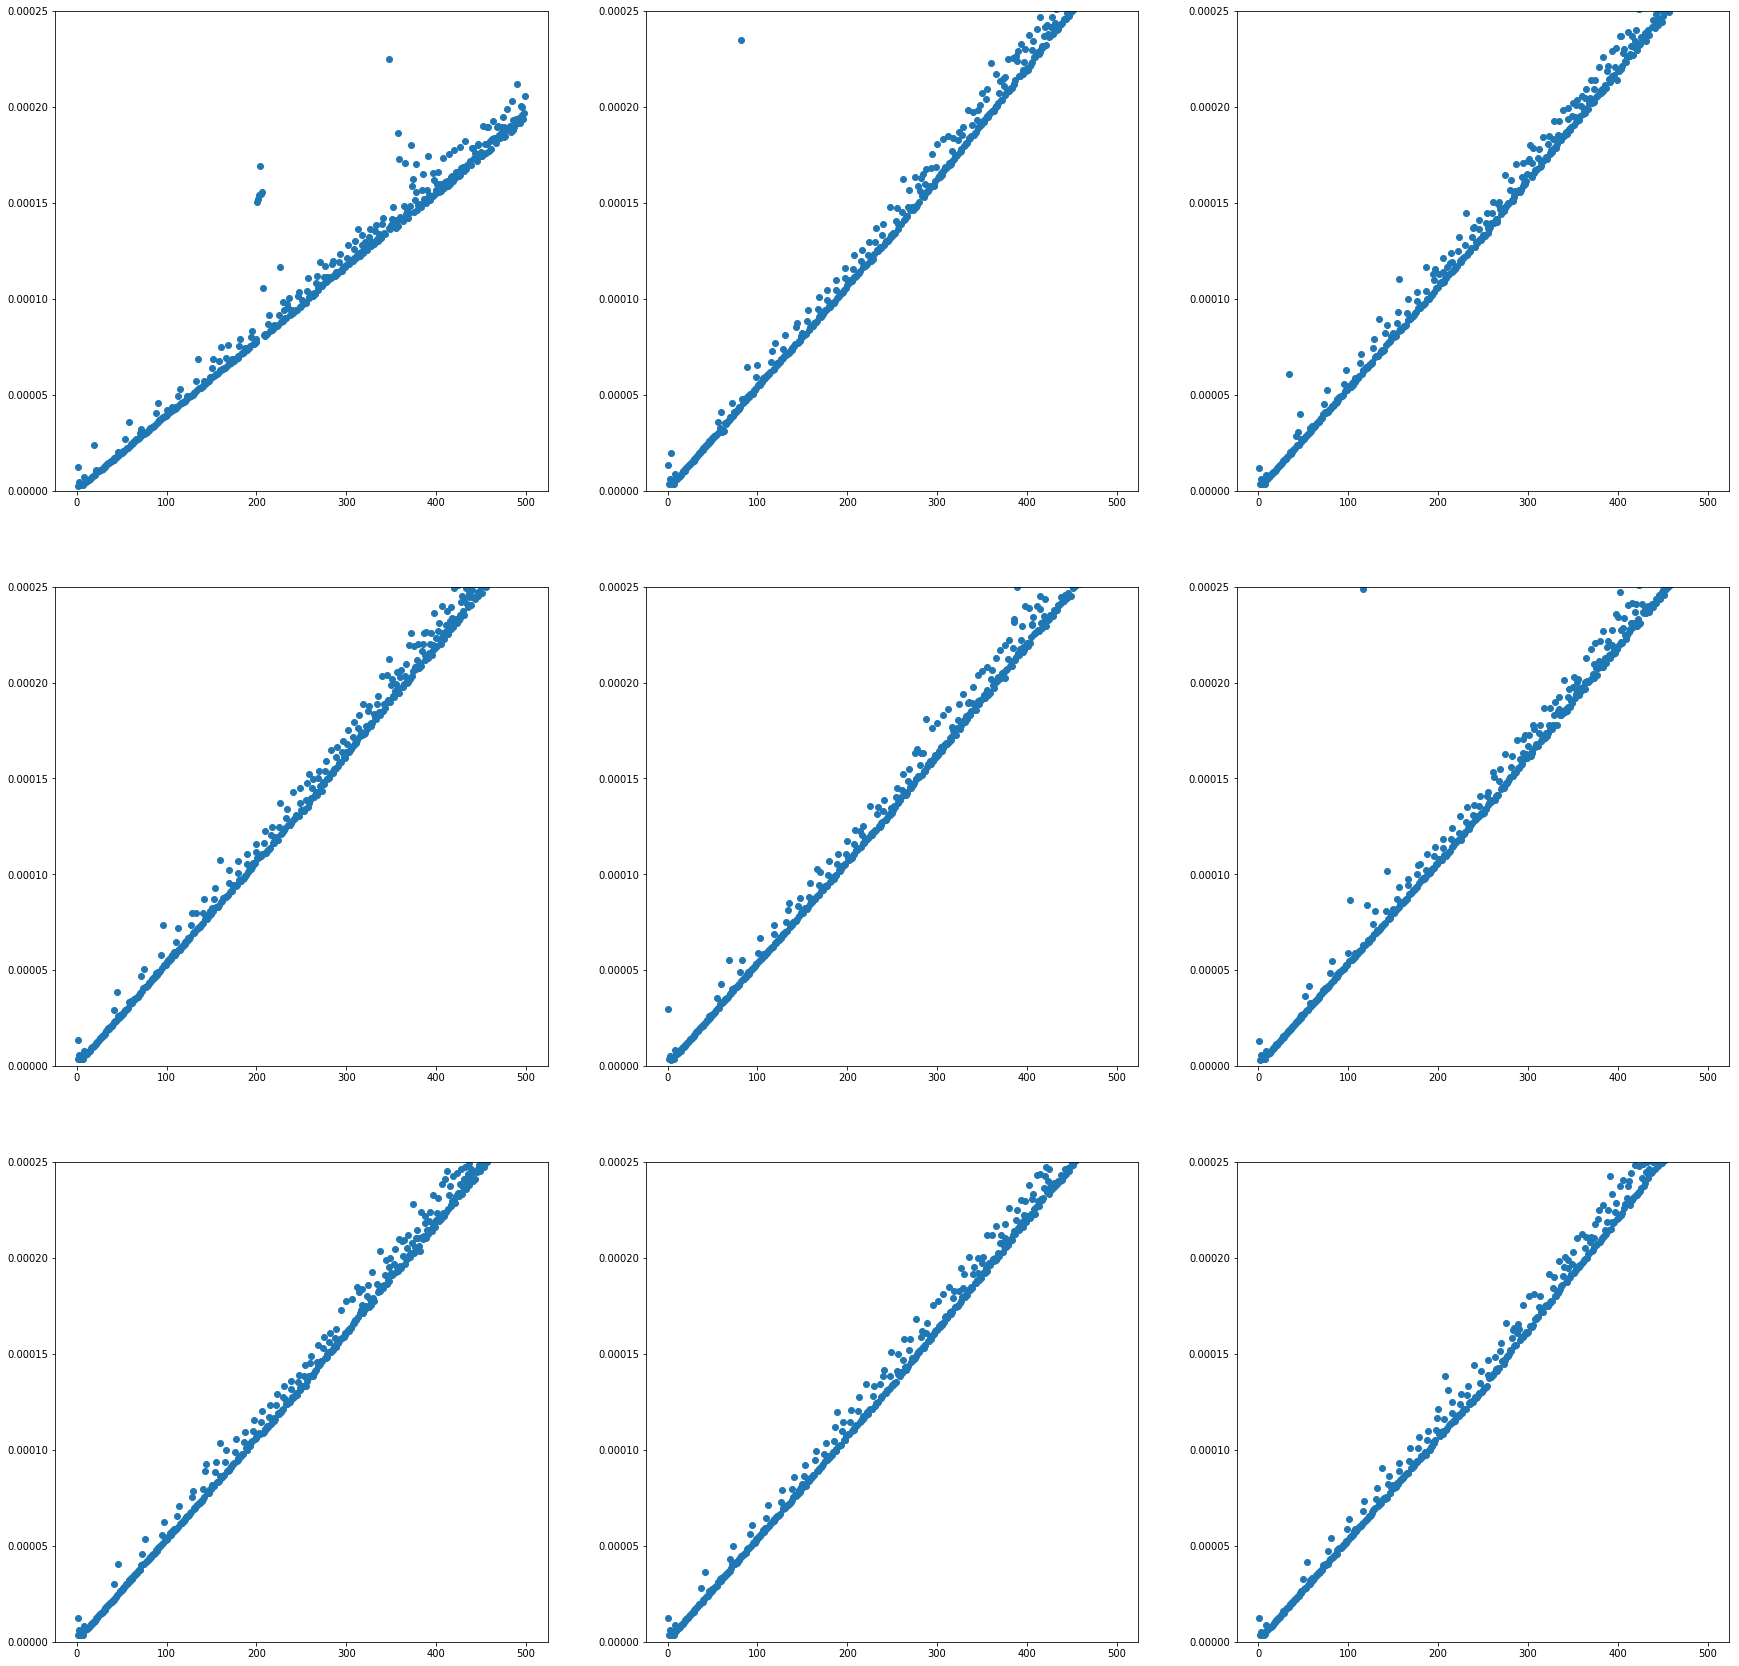

In [90]:
f, axes = plt.subplots(3,3, figsize=(30, 30))

for ax in axes.ravel():
  l = []
  for i in range(1,500):
    t0=time()
    z=F4(i)
    t1=time()
    l.append(t1-t0)  
  ax.set_ylim([0,0.00025])
  ax.scatter(range(1,500), l)

Неожиданно, намного хуже. Видимо python умеет как-то оптимизировать рекурсию. Пока не разбирался. В python опыт еще недостаточный. 

Лучшим по времени оказывается следующий гибрид:

In [0]:
def F5(n):
  return min(F1(n), analytical(n))

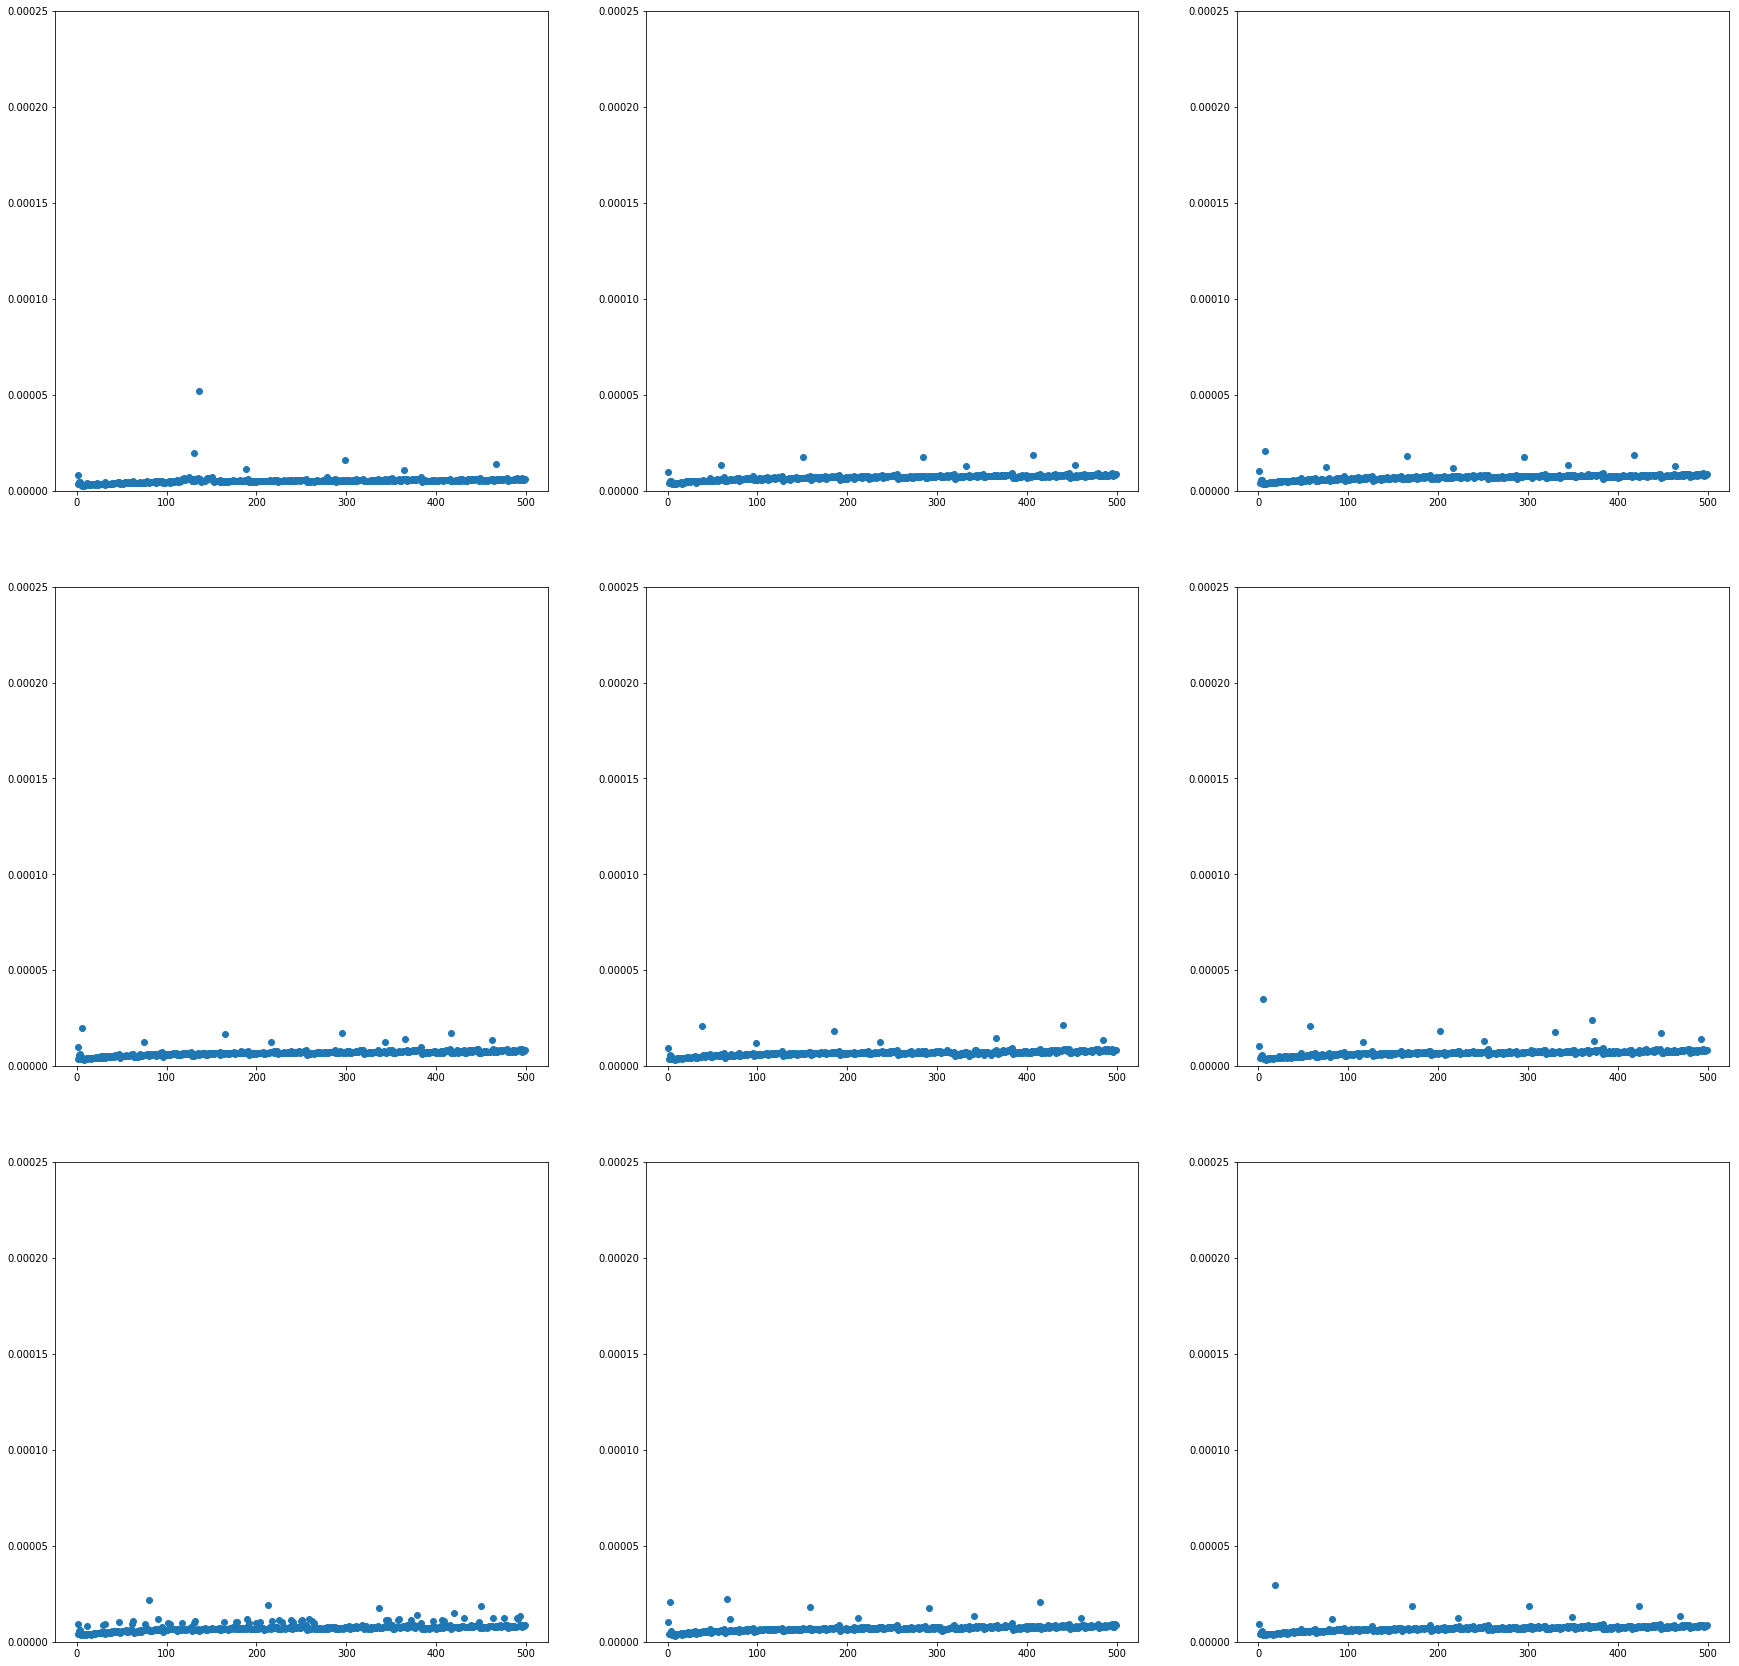

In [92]:
f, axes = plt.subplots(3,3, figsize=(30, 30))

for ax in axes.ravel():
  l = []
  for i in range(1,500):
    t0=time()
    z=F5(i)
    t1=time()
    l.append(t1-t0)  
  ax.set_ylim([0,0.00025])
  ax.scatter(range(1,500), l)